In [1]:
# install.packages("tidyverse")
library(ggplot2)

In [2]:
# functions
lm_eqn <- function(m){
    eq <- substitute(italic(y) == a + b * italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 5),
              b = format(unname(coef(m)[2]), digits = 5),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));
}

In [3]:
dataFull <- read.csv("mdpv4.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]

In [4]:
# data0 <- data[data$trial == 0,]
# data1 <- data[data$trial == 1,]
# data2 <- data[data$trial == 2,]

data <- dataFull[dataFull$envSeed == 3701 & dataFull$alpha == 0.4 & dataFull$syncBackups == 1,]

In [5]:
head(data, 2)
print("rows")
nrow(dataFull)
print("cols")
ncol(dataFull)
print("unique alpha")
sort(unique(dataFull$alpha))

print(paste("random score", head(data, 1)$endScoreRand, "bellman score", head(data, 1)$endScoreBell))

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,aggs,backups,endScoreStochBell,endScore,finalDiff,finalDiffAvg,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
181,10,0.4,0.6,0,4,1,True,3701,0,30300,⋯,30294,30300,2119.566,4074.901,0.4650989,0.5557704,0.2937817,22.51547,10,2020
296,10,0.4,0.6,0,8,1,True,3701,1,30300,⋯,30235,30300,2105.508,3898.605,0.5170388,0.4164114,0.2622585,23.96695,0,1010


[1] "rows"


[1] 1920

[1] "cols"


[1] 26

[1] "unique alpha"


[1] 0.001 0.002 0.004 0.005 0.008 0.010 0.016 0.020 0.032 0.040 0.050 0.080
[13] 0.100 0.160 0.200 0.320 0.400 0.500 0.800 1.000

[1] "random score 1275.32935695992 bellman score 3913.43256758843"



Call:
lm(formula = log10(sqDiff) ~ log10(N), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23241 -0.03884  0.02659  0.05395  0.18134 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.53725    0.03529  -43.57   <2e-16 ***
log10(N)    -0.93108    0.04785  -19.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1116 on 28 degrees of freedom
Multiple R-squared:  0.9311,	Adjusted R-squared:  0.9287 
F-statistic: 378.6 on 1 and 28 DF,  p-value: < 2.2e-16


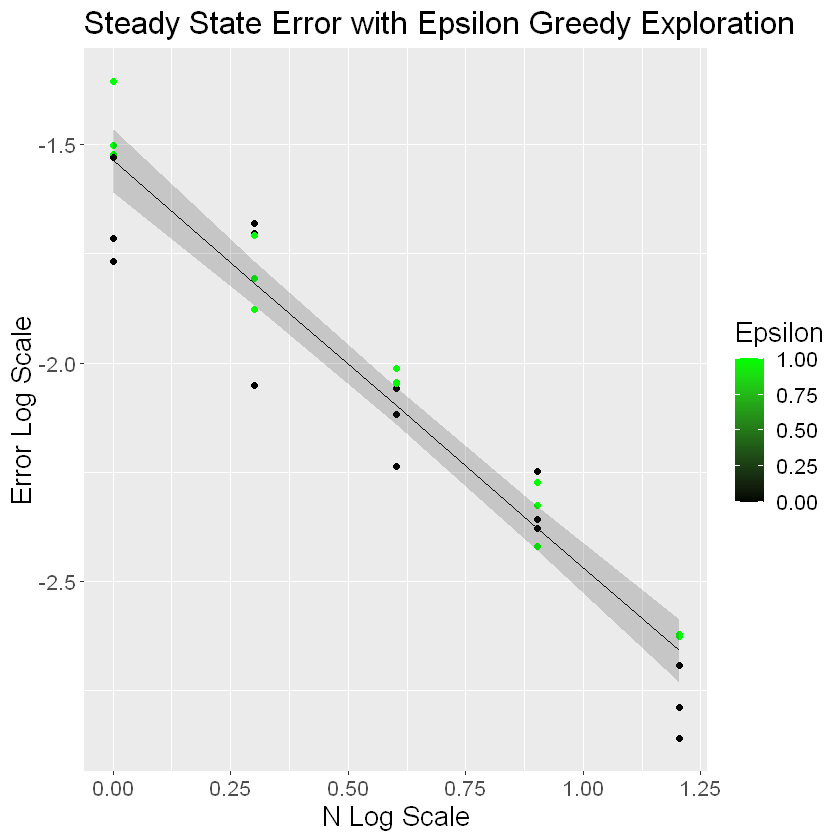

In [6]:
title <- "Steady State Error with Epsilon Greedy Exploration"
data <- dataFull[dataFull$alpha == 0.01 & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
N = data$fedP
sqDiff = data$finalDiffAvg ** 2
model <- lm(log10(sqDiff) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiffAvg ** 2)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("N Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn("Epsilon", colors = c("black", "green"))
p <- p + geom_line(aes(log10(fedP), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

Warning message in eval(expr, envir, enclos):
"NaNs produced"



Call:
lm(formula = log10(sqDiff) ~ log10(N) * syncLog, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30507 -0.13137 -0.00695  0.14150  0.32621 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.51861    0.04566 -33.257   <2e-16 ***
log10(N)         -1.13915    0.05940 -19.178   <2e-16 ***
syncLog          -0.02099    0.02125  -0.988    0.325    
log10(N):syncLog  0.26305    0.02676   9.832   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1625 on 122 degrees of freedom
Multiple R-squared:  0.832,	Adjusted R-squared:  0.8278 
F-statistic: 201.4 on 3 and 122 DF,  p-value: < 2.2e-16


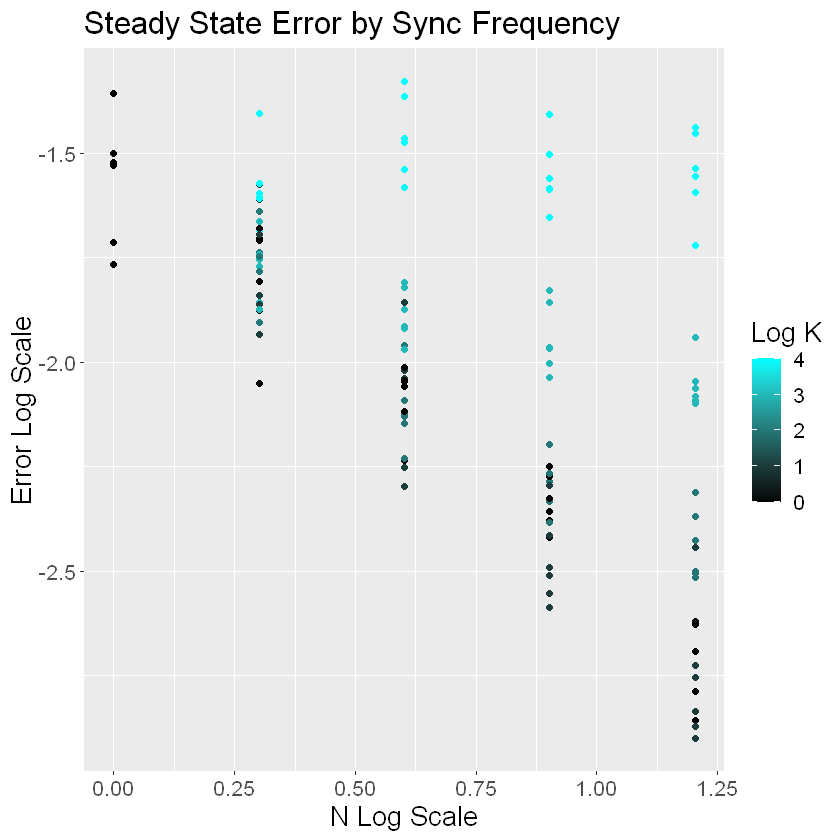

In [7]:
title <- "Steady State Error by Sync Frequency"
data <- dataFull[dataFull$alpha == 0.01,]
N = data$fedP
sqDiff = data$finalDiffAvg ** 2
syncLog <- log10(data$syncBackups)
syncLog[is.nan(syncLog)] <- 0
model <- lm(log10(sqDiff) ~ log10(N)*syncLog, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiffAvg ** 2)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("N Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(color = syncLog))
p <- p + scale_color_gradientn("Log K", colors = c("black", "cyan"))
p


Call:
lm(formula = log10(sqDiff) ~ log10(N) + log10(alpha), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34524 -0.08685 -0.02131  0.05680  0.62837 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.567202   0.017994   31.52   <2e-16 ***
log10(N)     -1.012145   0.017479  -57.91   <2e-16 ***
log10(alpha)  0.994491   0.007765  128.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1467 on 429 degrees of freedom
Multiple R-squared:  0.9775,	Adjusted R-squared:  0.9774 
F-statistic:  9335 on 2 and 429 DF,  p-value: < 2.2e-16


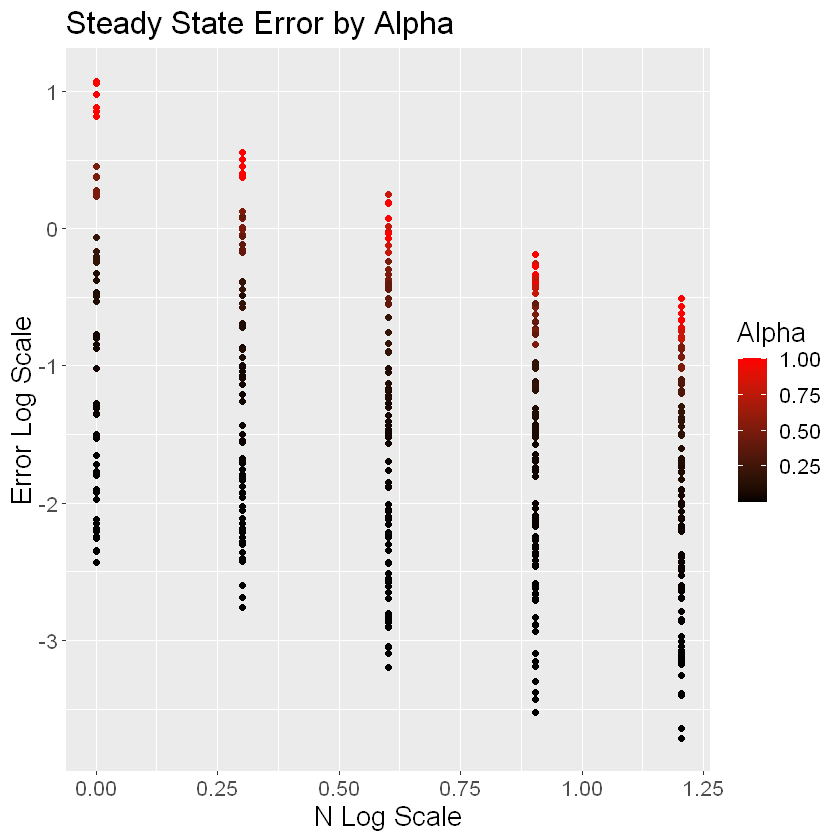

In [8]:
title <- "Steady State Error by Alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
N = data$fedP
sqDiff = data$finalDiffAvg ** 2
model <- lm(log10(sqDiff) ~ log10(N) + log10(alpha), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(N), y=log10(finalDiffAvg ** 2)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("N Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn("Alpha", colors = c("black", "red"))
p


Call:
lm(formula = log10(sqDiff) ~ log10(NTerm), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33358 -0.08509 -0.02364  0.05334  0.62434 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.560599   0.016602   33.77   <2e-16 ***
log10(NTerm) 0.997019   0.007296  136.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1467 on 430 degrees of freedom
Multiple R-squared:  0.9775,	Adjusted R-squared:  0.9774 
F-statistic: 1.867e+04 on 1 and 430 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


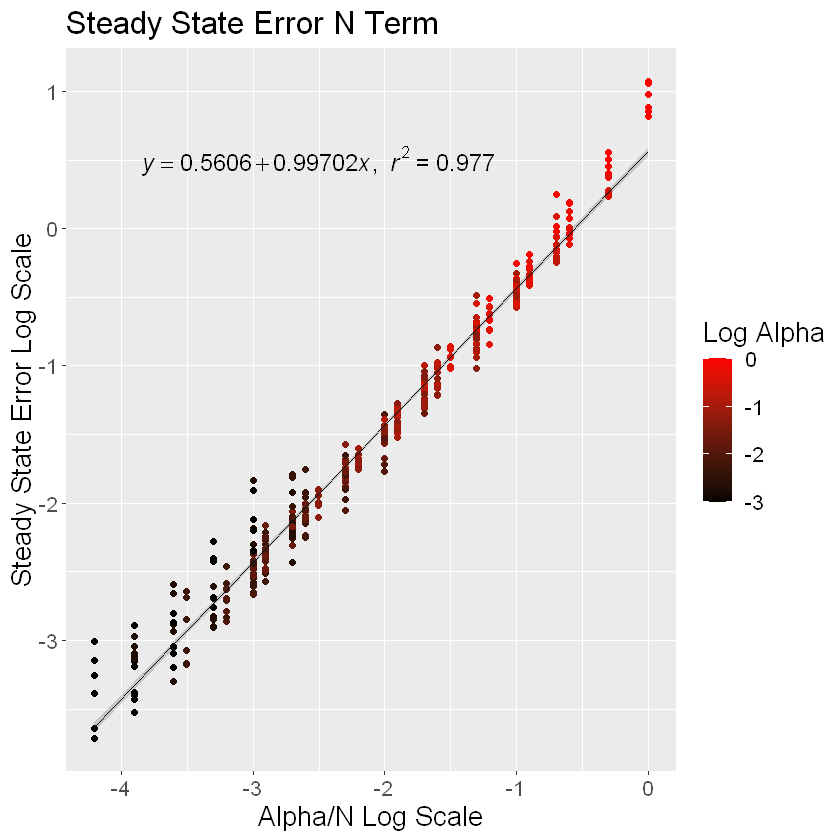

In [9]:
title <- "Steady State Error N Term"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
NTerm = data$alpha/data$fedP
sqDiff = data$finalDiffAvg ** 2
model <- lm(log10(sqDiff) ~ log10(NTerm), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=log10(NTerm), y=log10(finalDiffAvg ** 2)))
p <- p + ggtitle(title)
p <- p + xlab("Alpha/N Log Scale") + ylab("Steady State Error Log Scale")
p <- p + theme(text = element_text(size = 16))
p <- p + annotate("text", x=-2.5, y=0.5, label= lm_eqn(model), parse = TRUE, size=5)
p <- p + geom_point(aes(color = log10(alpha)))
p <- p + scale_color_gradientn("Log Alpha", colors = c("black", "red"))
p <- p + geom_line(aes(log10(NTerm), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,aggs,backups,endScoreStochBell,endScore,finalDiff,finalDiffAvg,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
93,10,0.002,0.6,1,4,1,True,3701,0,111100,⋯,111087,111100,2165.602,3898.605,0.028422764,0.03758235,0.3000666,13.98159,360,37370
101,10,0.002,0.6,0,4,1,True,3701,0,151500,⋯,151481,151500,2007.907,3898.605,0.057332349,0.04486439,0.3133317,22.70083,420,43430
102,10,0.002,0.6,1,16,1,True,3701,0,111100,⋯,110833,111100,2104.419,3898.605,0.025930670,0.03011752,0.3091950,10.27851,360,37370
122,10,0.002,0.6,1,8,1,True,3701,0,101000,⋯,100707,101000,2218.669,3898.605,0.033535169,0.03601932,0.3057647,12.89111,370,38380
191,10,0.002,0.6,0,16,1,True,3701,2,126250,⋯,126104,126250,2171.350,3898.605,0.009175267,0.01996917,0.3157559,21.15846,390,40400
243,10,0.002,0.6,0,8,1,True,3701,1,141400,⋯,141394,141400,2072.609,3898.605,0.039018480,0.03401730,0.3009320,19.94020,440,45450
366,10,0.002,0.6,0,2,1,True,3701,1,111100,⋯,110084,111100,2193.939,3898.605,0.083650310,0.07967879,0.3106592,22.62964,410,42420
374,10,0.002,0.6,0,8,1,True,3701,0,111100,⋯,110842,111100,2045.668,3898.605,0.049760751,0.05061047,0.3062990,20.41848,400,41410
472,10,0.002,0.6,1,1,-1,True,3701,2,101000,⋯,0,101000,2065.059,3942.337,0.054485606,0.07468639,0.3119880,11.68852,360,37370



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031518 -0.019775  0.002367  0.020967  0.053654 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.6040409  0.0076675 600.460   <2e-16 ***
log10(N)    -0.0001778  0.0103985  -0.017    0.986    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02425 on 28 degrees of freedom
Multiple R-squared:  1.044e-05,	Adjusted R-squared:  -0.0357 
F-statistic: 0.0002924 on 1 and 28 DF,  p-value: 0.9865


Saving 6.67 x 6.67 in image


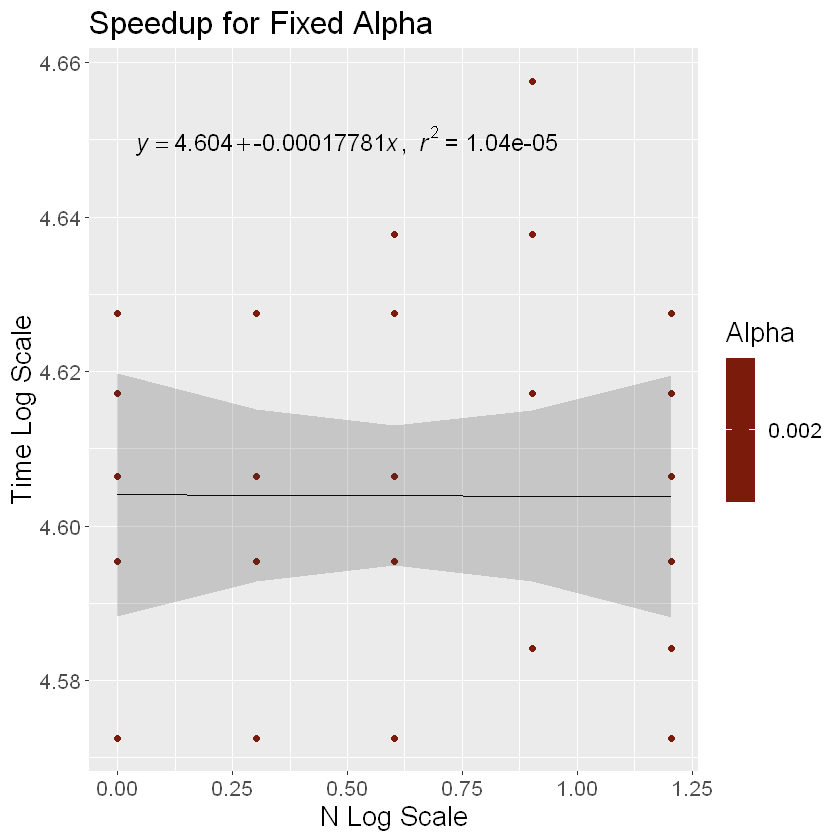

In [10]:
title <- "Speedup for Fixed Alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.1 & dataFull$alpha == 0.002,]
data

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + xlab("N Log Scale") + ylab("Time Log Scale")
p <- p + theme(text = element_text(size = 16))
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn("Alpha", colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + annotate("text", x=0.5, y=4.65, label= lm_eqn(model), parse = TRUE, size=5)
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,aggs,backups,endScoreStochBell,endScore,finalDiff,finalDiffAvg,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
17,10,0.016,0.6,0,8,1,True,3701,1,40400,⋯,40320,40400,2007.561,3898.605,0.04771012,0.07580440,0.3139974,25.56619,40,5050
20,10,0.016,0.6,0,8,1,True,3701,2,30300,⋯,30151,30300,2150.766,3898.605,0.05264867,0.08257617,0.2796279,20.61795,50,6060



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08029 -0.02672  0.01635  0.01843  0.05099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.59907    0.01116  412.27   <2e-16 ***
log10(N)    -0.94347    0.01513  -62.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03528 on 28 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9926 
F-statistic:  3889 on 1 and 28 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


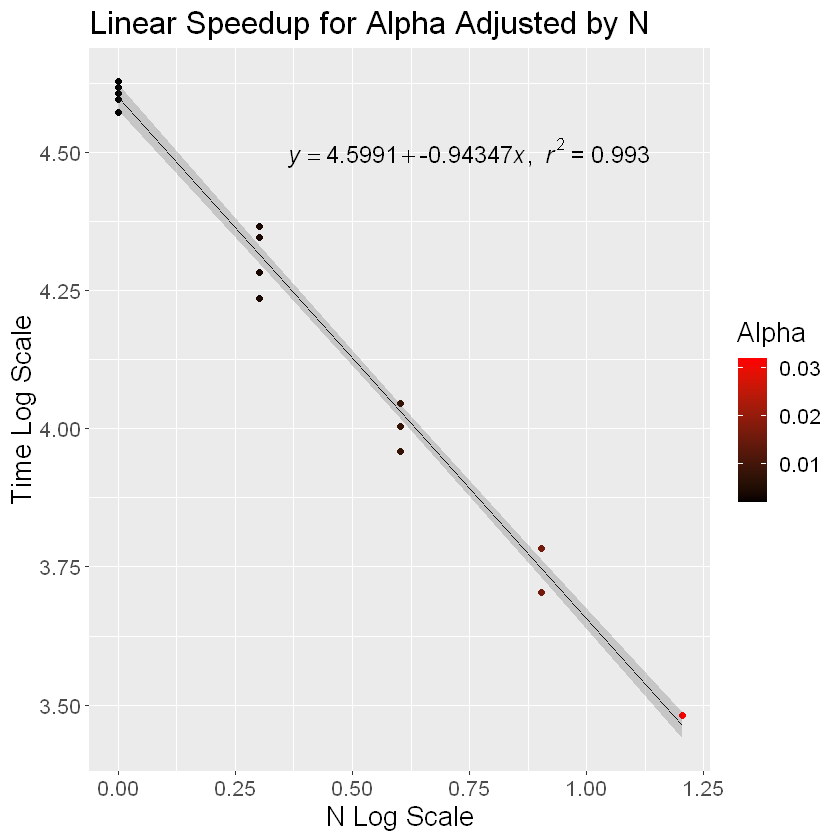

In [11]:
title <- "Linear Speedup for Alpha Adjusted by N"
A <- 0.002
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.1 & dataFull$alpha == A * dataFull$fedP,]
head(data,2)

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + xlab("N Log Scale") + ylab("Time Log Scale")
p <- p + theme(text = element_text(size = 16))
p <- p + geom_point(aes(color = alpha))
p <- p + annotate("text", x=0.75, y=4.5, label= lm_eqn(model), parse = TRUE, size=5)
p <- p + scale_color_gradientn("Alpha", colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,aggs,backups,endScoreStochBell,endScore,finalDiff,finalDiffAvg,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
204,10,0.032,0.6,0,16,10000,True,3701,1,30300,⋯,3,30300,2154.848,3898.605,0.2949294,0.2374306,0.1753303,22.462991,20,3030
227,10,0.032,0.6,1,16,10000,True,3701,2,30300,⋯,3,30300,2117.443,3898.605,0.1562354,0.3463481,0.2852583,9.726253,20,3030



Call:
lm(formula = log10(T) ~ log10(N), data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.193037 -0.054101 -0.003994  0.048868  0.307405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.57163    0.02913  156.96   <2e-16 ***
log10(N)    -0.85508    0.03950  -21.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0921 on 28 degrees of freedom
Multiple R-squared:  0.9436,	Adjusted R-squared:  0.9416 
F-statistic: 468.6 on 1 and 28 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


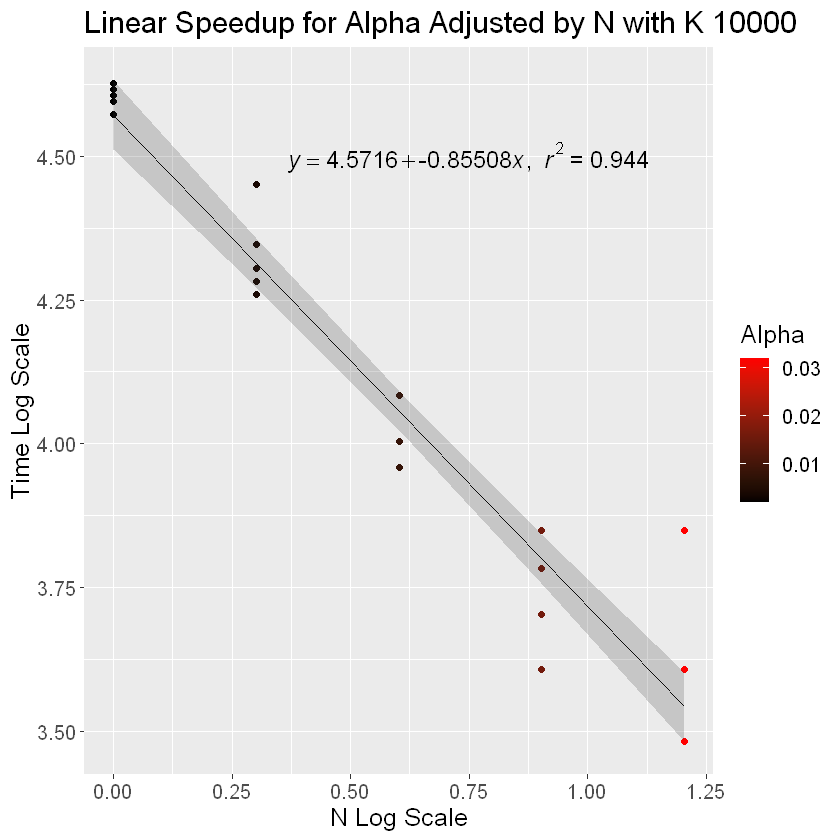

In [12]:
K <- 10000
title <- paste("Linear Speedup for Alpha Adjusted by N with K", K)
data <- dataFull[(dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.1 & dataFull$alpha == A * dataFull$fedP,]
head(data,2)

N = data$fedP
T = data$threshBack
model <- lm(log10(T) ~ log10(N), data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=log10(N), y=log10(T)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 15))
p <- p + xlab("N Log Scale") + ylab("Time Log Scale")
p <- p + geom_point(aes(color = alpha))
p <- p + annotate("text", x=0.75, y=4.5, label= lm_eqn(model), parse = TRUE, size=5)
p <- p + scale_color_gradientn("Alpha", colors = c("black", "red"))
p <- p + geom_line(aes(log10(N), fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

$D^2 <= (1 – \alpha)^T + \frac{\alpha}{N} + (K-1) \alpha ^2$

Since linear speedup is dependant on scaling alpha by N while getting the same steady state error, using a learning rate $\alpha' = \alpha N$, the equation is 

$D^2 <= (1 – \alpha N)^T + \alpha + (K-1) (\alpha N) ^2$

In the limit as K aproaches infinity, the equation should look the same as K=1 and N=1, since this is essentially independantly training N models.

$D^2 <= (1 – \alpha')^T + \alpha'$

[1] "N term model"



Call:
lm(formula = log10(sqDiff) ~ log10(NTerm), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9040 -0.3522 -0.1507  0.2929  1.5562 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.04363    0.02446   42.66   <2e-16 ***
log10(NTerm)  1.07212    0.01050  102.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4348 on 1918 degrees of freedom
Multiple R-squared:  0.8446,	Adjusted R-squared:  0.8446 
F-statistic: 1.043e+04 on 1 and 1918 DF,  p-value: < 2.2e-16


[1] "theoretical model"



Call:
lm(formula = sqDiff ~ NTerm + KTerm, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5396 -0.1934 -0.1289 -0.1103 11.1775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.228e-01  2.794e-02   4.396 1.16e-05 ***
NTerm       9.068e+00  2.578e-01  35.176  < 2e-16 ***
KTerm       6.163e-04  2.018e-05  30.533  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.109 on 1917 degrees of freedom
Multiple R-squared:  0.6037,	Adjusted R-squared:  0.6033 
F-statistic:  1460 on 2 and 1917 DF,  p-value: < 2.2e-16


[1] "added other variables"



Call:
lm(formula = sqDiff ~ NTerm + KTerm + I(alpha^2) + I(syncBackups - 
    1) + I((syncBackups - 1) * (alpha^1)) + I((syncBackups - 
    1) * (alpha^3)) + I((syncBackups - 1)^2 * (alpha^2)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8166 -0.0178  0.0161  0.0216  6.8683 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.909e-02  2.173e-02  -0.878   0.3799    
NTerm                               4.294e+00  2.296e-01  18.704   <2e-16 ***
KTerm                               5.141e-03  3.539e-04  14.527   <2e-16 ***
I(alpha^2)                          1.998e+00  1.023e-01  19.536   <2e-16 ***
I(syncBackups - 1)                  2.383e-06  6.355e-06   0.375   0.7077    
I((syncBackups - 1) * (alpha^1))    2.060e-04  1.065e-04   1.934   0.0533 .  
I((syncBackups - 1) * (alpha^3))    4.304e-04  2.178e-04   1.976   0.0483 *  
I((syncBackups - 1)^2 * (alpha^2)) -5.278e-07  1.666e-08 -3

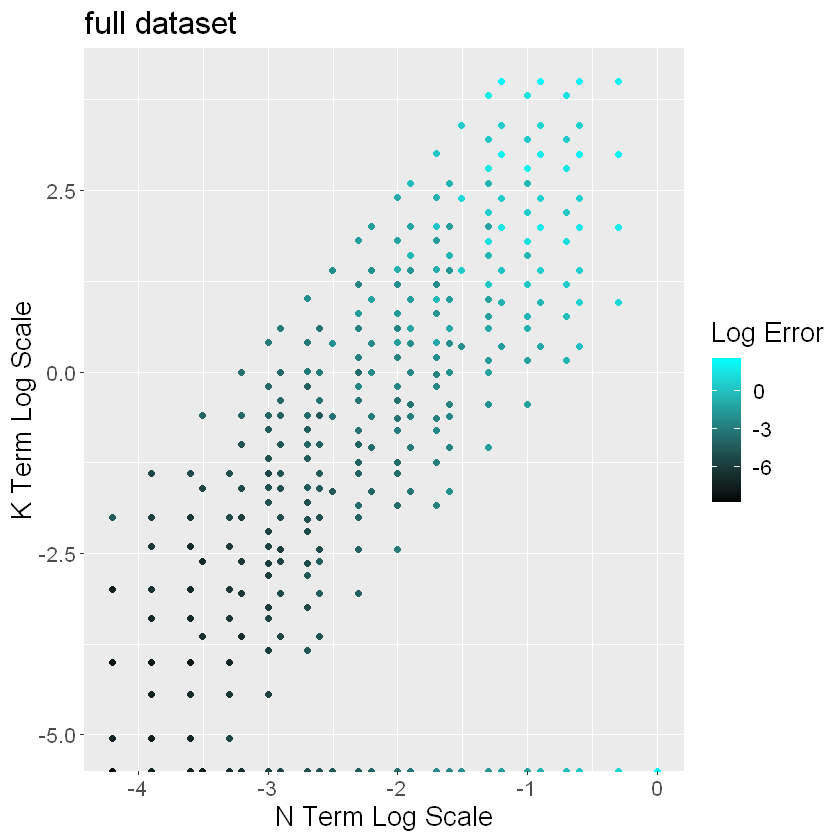

In [13]:
title <- "full dataset"
data <- dataFull
data$syncBackups[data$syncBackups == -1] <- 1

ifedP = 1/data$fedP
NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiffAvg ** 2

Nmodel <- lm(log10(sqDiff) ~ log10(NTerm), data)
print("N term model")
summary(Nmodel)

model <- lm(sqDiff ~ NTerm + KTerm, data)
print("theoretical model")
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

print("added other variables")
modelCofounded <- lm(sqDiff ~ NTerm + KTerm + I(alpha**2) + I(syncBackups - 1) + I((syncBackups - 1) * (alpha ** 1)) + I((syncBackups - 1) * (alpha ** 3)) + I((syncBackups - 1)**2 * (alpha ** 2)), data)
summary(modelCofounded)


p <- ggplot(predict, aes(x=log10(NTerm), y=log10(KTerm)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("N Term Log Scale") + ylab("K Term Log Scale")
p <- p + theme(text = element_text(size = 16))
p <- p + geom_point(aes(color = log(sqDiff))) 
p <- p + scale_color_gradientn("Log Error", colors = c("black", "cyan"))
p

[1] "theoretical model"



Call:
lm(formula = sqDiff ~ NTerm + KTerm, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5396 -0.1934 -0.1289 -0.1103 11.1775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.228e-01  2.794e-02   4.396 1.16e-05 ***
NTerm       9.068e+00  2.578e-01  35.176  < 2e-16 ***
KTerm       6.163e-04  2.018e-05  30.533  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.109 on 1917 degrees of freedom
Multiple R-squared:  0.6037,	Adjusted R-squared:  0.6033 
F-statistic:  1460 on 2 and 1917 DF,  p-value: < 2.2e-16


[1] 0.10 0.16 0.20 0.32 0.50 0.80 1.00

[1] 16

[1]  1000 10000

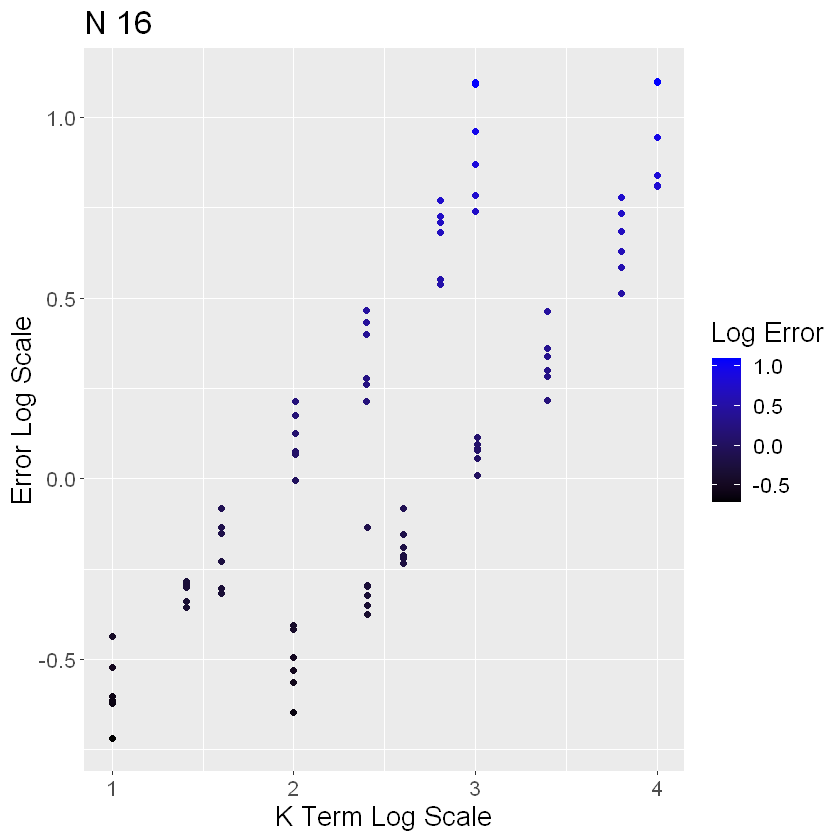

In [14]:
title <- "N 16"
data <- dataFull
data$syncBackups[data$syncBackups == -1] <- 1

ifedP = 1/data$fedP
NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiffAvg ** 2

# Nmodel <- lm(log10(sqDiff) ~ log10(NTerm), data)
# print("N term model")
# summary(Nmodel)

model <- lm(sqDiff ~ NTerm + KTerm, data)
print("theoretical model")
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

# print("added other variables")
# modelCofounded <- lm(sqDiff ~ NTerm + KTerm + I(alpha**2) + I(syncBackups - 1) + I((syncBackups - 1) * (alpha ** 1)) + I((syncBackups - 1) * (alpha ** 3)) + I((syncBackups - 1)**2 * (alpha ** 2)), data)
# summary(modelCofounded)


predictN16 <- predict[predict$fedP == 16 & predict$syncBackups != 1 & predict$syncBackups >= 1000 & predict$alpha >= 0.1, ]
sort(unique(predictN16$alpha))
sort(unique(predictN16$fedP))
sort(unique(predictN16$syncBackups))

NTermN16 = predictN16$alpha/predictN16$fedP
KTermN16 = (predictN16$syncBackups - 1) * (predictN16$alpha ** 2)
sqDiffN16 = predictN16$finalDiffAvg ** 2

p <- ggplot(predictN16, aes(x=log10(KTermN16), y=log10(sqDiffN16)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("K Term Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(color = log10(sqDiffN16))) 
p <- p + scale_color_gradientn("Log Error", colors = c("black", "blue"))
p


[1] 256
[1] 0.1 0.2 0.3 0.4 0.5 0.6
  [1]    1    2    3    4    5    6    7    8    9   10   20   30   40   50   60
 [16]   70   80   90  100  110  120  130  140  150  160  170  180  190  200  210
 [31]  220  230  240  250  260  270  280  290  300  310  320  330  340  350  360
 [46]  370  380  390  400  410  420  430  440  450  460  470  480  490  500  510
 [61]  520  530  540  550  560  570  580  590  600  610  620  630  640  650  660
 [76]  670  680  690  700  710  720  730  740  750  760  770  780  790  800  810
 [91]  820  830  840  850  860  870  880  890  900  910  920  930  940  950  960
[106]  970  980  990 1000 2000 3000 4000 5000 6000 7000 8000 9000
[1] "New equation N = 16, K != 1"



Call:
lm(formula = log10(sqDiff) ~ I(log10(data$syncBackups - 1)) + 
    log10(data$alpha) + log10(1 + Frac), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37628 -0.05033 -0.00087  0.05460  0.38902 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.263e-01  1.882e-02   12.03   <2e-16 ***
I(log10(data$syncBackups - 1))  2.075e-01  7.181e-03   28.90   <2e-16 ***
log10(data$alpha)               1.378e+00  8.190e-03  168.21   <2e-16 ***
log10(1 + Frac)                -1.466e+03  4.460e+01  -32.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08247 on 1778 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9629 
F-statistic: 1.54e+04 on 3 and 1778 DF,  p-value: < 2.2e-16


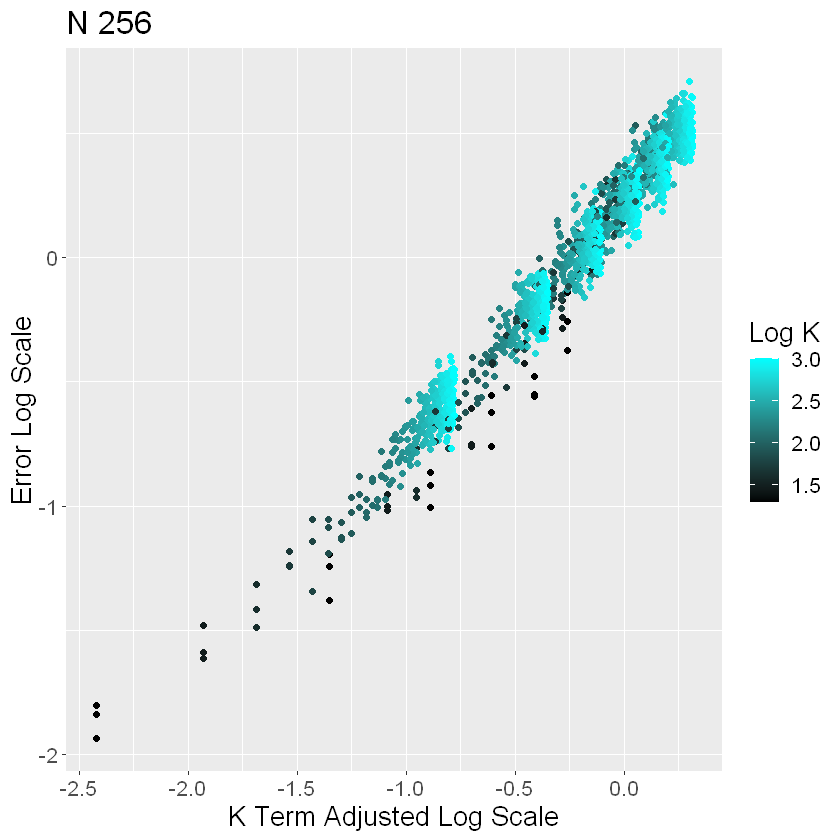

Saving 6.67 x 6.67 in image


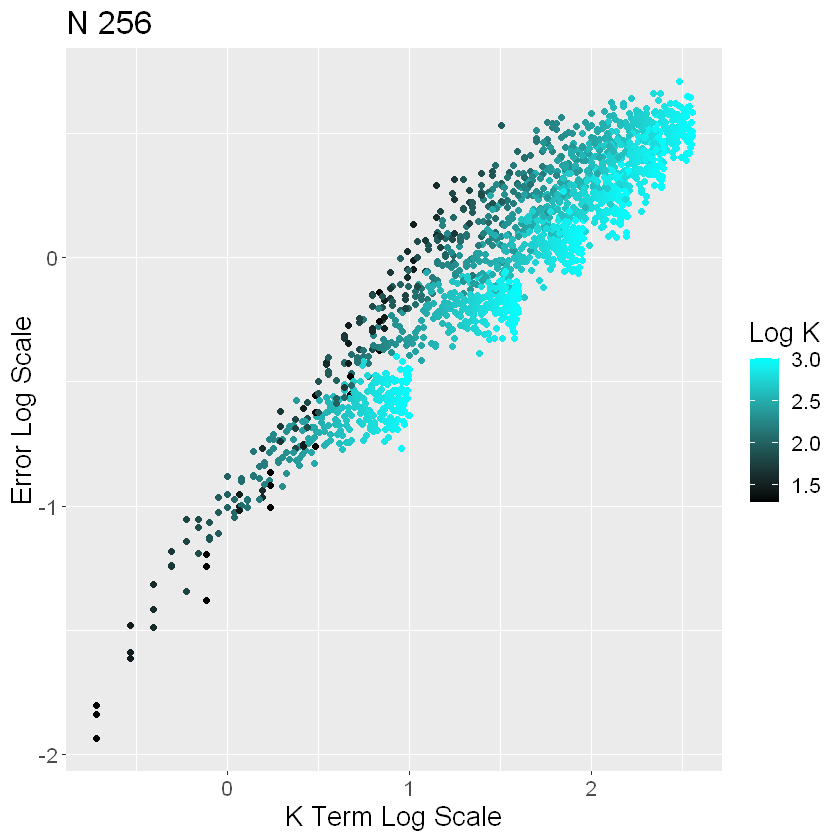

In [18]:
dataLargeN <- read.csv("mdpvK.csv", header=TRUE)
title <- "N 256"
print(sort(unique(dataLargeN$fedP)))
print(sort(unique(dataLargeN$alpha)))
print(sort(unique(dataLargeN$syncBackups)))

data = dataLargeN[dataLargeN$syncBackups <= 1000 & dataLargeN$syncBackups >= 20 & dataLargeN$alpha >= 0.1,]

NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiffAvg ** 2

# model <- lm(sqDiff ~ NTerm + KTerm, data)
# print("N = 256, K != 1")
# summary(model)

Frac = I(1/(data$fedP * data$alpha * (data$syncBackups - 1)))
model <- lm(log10(sqDiff) ~ I(log10(data$syncBackups - 1)) + log10(data$alpha) + log10(1+Frac), data)
print("New equation N = 16, K != 1")
summary(model)

# print(coef(model)[2])
# unname(coef(model)[1]) + 
# + unname(coef(model)[4]) * Frac
KTermAdj = unname(coef(model)[2]) * log10((data$syncBackups - 1)) + unname(coef(model)[3]) * log10(data$alpha) + unname(coef(model)[4]) * log10(1+Frac)

p <- ggplot(data, aes(x=KTermAdj, y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("K Term Adjusted Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(color = log10(syncBackups))) 
p <- p + scale_color_gradientn("Log K", colors = c("black", "cyan"))
p

p <- ggplot(data, aes(x=log10(KTerm), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("K Term Log Scale") + ylab("Error Log Scale")
p <- p + geom_point(aes(color = log10(syncBackups))) 
p <- p + scale_color_gradientn("Log K", colors = c("black", "cyan"))
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", title, ".png"), fixed = TRUE), plot=p, device="png")

[1] 256
[1] 0.1 0.2 0.3 0.4 0.5 0.6
 [1]   20   30   40   50   60   70   80   90  100  110  120  130  140  150  160
[16]  170  180  190  200  210  220  230  240  250  260  270  280  290  300  310
[31]  320  330  340  350  360  370  380  390  400  410  420  430  440  450  460
[46]  470  480  490  500  510  520  530  540  550  560  570  580  590  600  610
[61]  620  630  640  650  660  670  680  690  700  710  720  730  740  750  760
[76]  770  780  790  800  810  820  830  840  850  860  870  880  890  900  910
[91]  920  930  940  950  960  970  980  990 1000


,K,cInt,cK,cAlpha,r2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,-1.4015804,1.2394697,1.957865,0.9617258
2,60,-0.9762341,0.9457255,1.793042,0.9571459



Call:
lm(formula = log10(cK) ~ log10(K), data = regressions)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.299083 -0.035192  0.001125  0.050364  0.184882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.24168    0.08126   15.28   <2e-16 ***
log10(K)    -0.78479    0.03066  -25.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09464 on 94 degrees of freedom
Multiple R-squared:  0.8745,	Adjusted R-squared:  0.8732 
F-statistic:   655 on 1 and 94 DF,  p-value: < 2.2e-16



Call:
lm(formula = log10(cAlpha) ~ log10(K), data = regressions)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028809 -0.010044  0.002881  0.006900  0.075327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.313386   0.012601   24.87   <2e-16 ***
log10(K)    -0.057052   0.004755  -12.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01468 on 94 degrees of freedom
Multiple R-squared:  0.605,	Adjusted R-squared:  0.6007 
F-statistic: 143.9 on 1 and 94 DF,  p-value: < 2.2e-16


Saving 6.67 x 6.67 in image


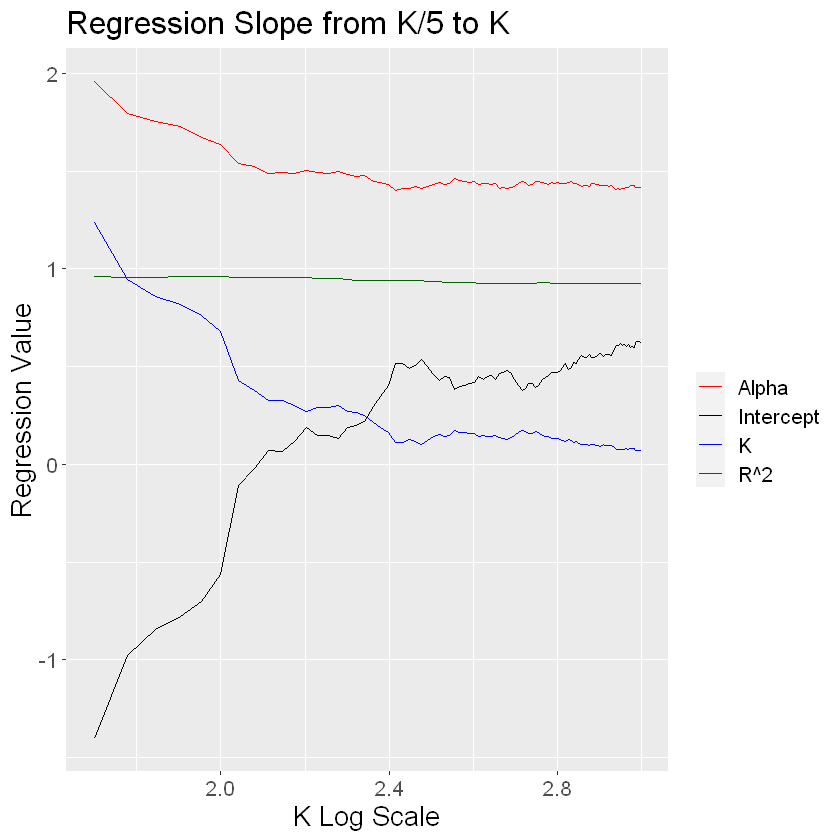

In [23]:
title <- "Regression Slope from K/5 to K"

data = dataLargeN[dataLargeN$syncBackups <= 1000 & dataLargeN$syncBackups >= 20 & dataLargeN$alpha >= 0.1,]

print(sort(unique(data$fedP)))
print(sort(unique(data$alpha)))
print(sort(unique(data$syncBackups)))

Klist = sort(unique(data$syncBackups))
regressions = data.frame(matrix(ncol=5,nrow=0, dimnames=list(NULL, c("K", "cInt", "cK", "cAlpha", "r2"))))

for (K in Klist){
    if (K < 50){next}
    Kmin = max(K / 5, 20)
    # Kmin = 20
    data = dataLargeN[dataLargeN$syncBackups <= K & dataLargeN$syncBackups >= Kmin & dataLargeN$alpha >= 0.2,]
    
    NTerm = data$alpha/data$fedP
    KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
    sqDiff = data$finalDiffAvg ** 2

    Frac = I(1/(data$fedP * data$alpha * (data$syncBackups - 1)))
    model <- lm(log10(sqDiff) ~ I(log10(data$syncBackups - 1)) + log10(data$alpha) + log10(1+Frac), data)
    
    regressions[nrow(regressions) + 1,] = list(K, unname(coef(model)[1]), unname(coef(model)[2]), unname(coef(model)[3]), summary(model)$r.squared)
    
}
head(regressions, 2)

modelK <- lm(log10(cK) ~ log10(K), regressions)
modelA <- lm(log10(cAlpha) ~ log10(K), regressions)
summary(modelK)
summary(modelA)

p <- ggplot(regressions)
p <- p + ggtitle(title)
p <- p + theme(text = element_text(size = 16))
p <- p + xlab("K Log Scale") + ylab("Regression Value")
p <- p + geom_line(aes(x=log10(K), y=cInt, colour='Intercept'))
p <- p + geom_line(aes(x=log10(K), y=cK, colour='K'))
p <- p + geom_line(aes(x=log10(K), y=cAlpha, colour='Alpha'))
p <- p + geom_line(aes(x=log10(K), y=r2, colour='R^2'))
p <- p + scale_colour_manual("", values=c('Intercept'='black', 'K'='blue', 'Alpha'='red', 'R^2'='dark green'))
p

ggsave(filename=gsub(" ", "", paste("featuredGraphs/", gsub("/", "", title), ".png"), fixed = TRUE), plot=p, device="png")
# p <- ggplot(regressions)
# p <- p + ggtitle(title)
# p <- p + geom_line(aes(x=log10(K), y=log10(cInt)), color="black")
# p <- p + geom_line(aes(x=log10(K), y=log10(cK)), color="blue")
# p <- p + geom_line(aes(x=log10(K), y=log10(cAlpha)), color="red")
# p <- p + geom_line(aes(x=log10(K), y=log10(r2)), color="dark green")
# p

Linear Space K 1000 to 10000
Larger N 256
Alpha 0.1 to 0.6

K might not be tight <= 1

Reduce the fraction term to just get an isolated log of Kterm

In [17]:
dataK1 <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
NmodelK1 <- lm(finalDiffAvg ** 2 ~ I(alpha/fedP) - 1, dataK1)
print("N term model K=1")
summary(NmodelK1)

predictFromK1 <- cbind(data, predict(NmodelK1, interval='confidence', newdata=data))

model <- lm(log10(finalDiffAvg ** 2 - fit) ~ log10(KTerm+0.0001), predictFromK1)
print("theoretical model remove NTerm")
summary(model)

[1] "N term model K=1"



Call:
lm(formula = finalDiffAvg^2 ~ I(alpha/fedP) - 1, data = dataK1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8025 -0.1607 -0.0335 -0.0046  4.7631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(alpha/fedP)   7.0115     0.1338    52.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4449 on 431 degrees of freedom
Multiple R-squared:  0.8643,	Adjusted R-squared:  0.864 
F-statistic:  2745 on 1 and 431 DF,  p-value: < 2.2e-16


[1] "theoretical model remove NTerm"



Call:
lm(formula = log10(finalDiffAvg^2 - fit) ~ log10(KTerm + 1e-04), 
    data = predictFromK1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33028 -0.08550 -0.00650  0.08383  0.43849 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.93878    0.01750  -53.64   <2e-16 ***
log10(KTerm + 1e-04)  0.59644    0.00911   65.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1233 on 1213 degrees of freedom
Multiple R-squared:  0.7794,	Adjusted R-squared:  0.7792 
F-statistic:  4286 on 1 and 1213 DF,  p-value: < 2.2e-16
